### **Practical Example: Iris Flower Species Prediction**

* In this notebook, we will use a Random Forest model to predict the species of Iris flowers based on their physical measurements. 

* This is a classic multiclass classification problem where we will predict one of three species: Setosa, Versicolor, or Virginica. 

* We will use the built-in Iris dataset from scikit-learn.

#### Necessary Steps

  1.  **Import Libraries and Load Data**: Import the necessary libraries and the Iris dataset.

  2.  **Define Features and Target**: Separate the dataset into feature variables (`X`) and the target variable (`y`).

  3.  **Split Data**: Divide the data into training and testing sets.

  4.  **Create and Train Model**: Instantiate a `RandomForestClassifier` and train it on the training data.

  5.  **Evaluate Model Performance**: Calculate and visualize the model's accuracy and a confusion matrix.

  6.  **Make Predictions**: Use the trained model to predict the species of a new, hypothetical flower.

---

### Step 1: Import Libraries and Load Data

* We start by importing all the necessary libraries, including the `load_iris` function from scikit-learn. 

* The Iris dataset is a great example because it is clean, well-understood, and perfect for demonstrating classification algorithms.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the iris dataset
iris = load_iris()

# Create a DataFrame for easier visualization and inspection
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("--- First 5 rows of the dataset ---")
df.head()

--- First 5 rows of the dataset ---


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
print("\n--- Target Names ---")
iris.target_names


--- Target Names ---


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Step 2: Define Features and Target

* We separate the dataset into features (`X`), which are the flower's measurements, and the target variable (`y`), which is the species of the flower.

In [4]:
X = df.drop('target', axis=1)
y = df['target']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (150, 4)
Target (y) shape: (150,)


### Step 3: Split Data into Training and Testing Sets

* To evaluate our model's performance on unseen data, we split the dataset into a training set (80%) and a testing set (20%).

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")

Training data size: 120
Testing data size: 30


### Step 4: Create and Train the Random Forest Model

* We instantiate the `RandomForestClassifier` with 100 trees (`n_estimators=100`) and train it on the training data. 

* This is a robust starting point for many classification problems.

In [6]:
# Create an instance of the Random Forest Classifier with 100 trees
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


### Step 5: Evaluate Model Performance

* After training, we use the `score()` method to calculate the model's accuracy on the testing data. 

* A high accuracy score indicates that our ensemble of trees has successfully learned the patterns.

In [7]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy on Test Data: {accuracy:.2f}")

Model Accuracy on Test Data: 1.00


In [8]:
# Generate predictions to create a confusion matrix and classification report
y_pred = model.predict(X_test)

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
cm


--- Confusion Matrix ---


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

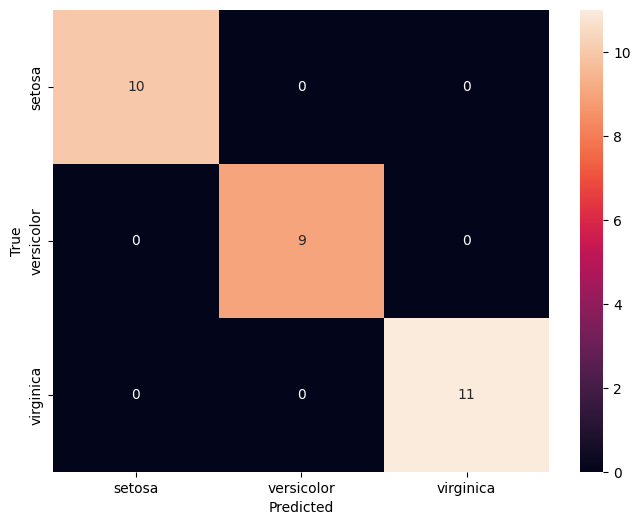

In [10]:
# Heatmap for Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
print("\n--- Classification Report ---\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


--- Classification Report ---

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Step 6: Analyze Feature Importance

* One of the benefits of Random Forest is the ability to determine which features were most important for making predictions. 

* We can extract this information from the trained model to gain insights into the data.

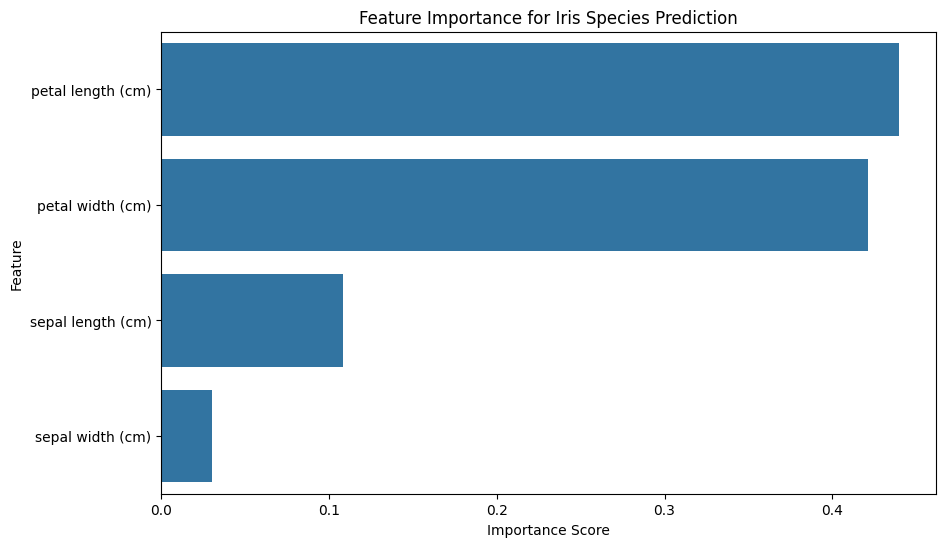

In [20]:
# Feature Importance from Random Forest Classifier model
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance for Iris Species Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

### Step 7: Make Predictions for a New Flower

* Finally, we can use our trained model to predict the species of a new, hypothetical flower.

In [19]:
# Create a hypothetical new flower's data
# Features: sepal length=6.5, sepal width=3.5, petal length=4.2, petal width=1.4
new_flower = pd.DataFrame([[
    6.5,  # sepal length (cm)
    3.5,  # sepal width (cm)
    4.2,  # petal length (cm)
    1.4   # petal width (cm)
]], columns=iris.feature_names)

# Make a prediction
prediction = model.predict(new_flower)
predicted_species = iris.target_names[prediction[0]]

print(f"The predicted species for the new flower is: {predicted_species}")

The predicted species for the new flower is: versicolor


#### Summary

* In this notebook, we've successfully built and trained a Random Forest classifier to predict Iris flower species. We learned how to:

  * **Understand the Concept**: We covered the core principles of Random Forest, including ensemble learning, bagging, and majority voting.

  * **Evaluate Performance**: We calculated a high accuracy score and a confusion matrix to measure the model's effectiveness on unseen data. 
    
    * The heatmap of the confusion matrix provided a clear visual breakdown of correct and incorrect predictions for each species.

  * **Analyze Feature Importance**: We visualized which features were most influential in the model's predictions, providing valuable insights.

  * **Make Predictions**: We used the trained model to predict the species for a new flower, demonstrating its practical application. 

* This notebook highlights the robustness and accuracy of the Random Forest algorithm on a classic classification problem.

---